In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import matplotlib.lines as mlines

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

### 1: Define functions that carry the time dependence for the detuning modulation

In [4]:
"""
Protocol 1:
"""
def delta_p1(t, args={}):
    val =  5.11 + 0.038*np.exp(21.52*(t - 0.5)**2)
    return val

def delta1(t, args={}):
    val = 0.29*(t - 0.5)
    return val

"""
Protocol 2:
"""
def delta_p2(t, args={}):
    val = 26.50*(t - 0.5) - 87.25*(t - 0.5)**3 + 312.08*(t - 0.5)**5
    return val

def delta2(t, args={}):
    val = 0.19 - 0.37*(t - 0.5)**2 - 4.85*(t - 0.5)**4
    return val

### 2: define the collapse operators that will encapsulate the noise from spontaneous emission
#### 2.1: Lambda System

In the lambda system we allow only spontaneous emission transitions of the type |e> --> |g1>


In [5]:
# Fixed coupling strength
Omega = 40.

# Decay rate for spontaneous decay
gamma_lambdaA = 0.1*Omega
gamma_lambdaB = 0.5*Omega
Lambda_c_opA = np.sqrt(gamma_lambdaA)*qt.projection(3,0,1)
Lambda_c_opB = np.sqrt(gamma_lambdaB)*qt.projection(3,0,1)

### 2.2: Ladder System

In [6]:
gamma_ladderA = [Omega*0.1,Omega*0.005]
gamma_ladderB = [Omega*0.1,Omega*0.05]

Ladder_c_opsA = [np.sqrt(gamma_ladderA[0])*qt.projection(3,0,1), np.sqrt(gamma_ladderA[1])*qt.projection(3,1,2)]
Ladder_c_opsB = [np.sqrt(gamma_ladderB[0])*qt.projection(3,0,1), np.sqrt(gamma_ladderB[1])*qt.projection(3,1,2)]

### 3: Write the Hamiltonian and explicity define the parameters involved!



In [7]:
times = np.linspace(0,1,100)

init_state = qt.fock_dm(3,0,0)
super_state =(1/np.sqrt(3))*(qt.fock(3,0,0) + qt.fock(3,1,0) + qt.fock(3,2,0))
super_dm = super_state*super_state.dag()

coupling_Hamiltonian = Omega*0.5*(qt.projection(3,0,1) + qt.projection(3,1,0) + qt.projection(3,2,1) + qt.projection(3,1,2))


detuning_p = Omega*qt.projection(3,1,1)

detuning = Omega*qt.projection(3,2,2)

results1lamA= qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p1],[detuning, delta1]], tlist=times,
                        rho0=init_state, c_ops=Lambda_c_opA)
results1lamB = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p1],[detuning, delta1]], tlist=times,
                        rho0=init_state, c_ops=Lambda_c_opB)

results1ladA = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p1],[detuning, delta1]], tlist=times,
                        rho0=init_state, c_ops=Ladder_c_opsA)
results1ladB = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p1],[detuning, delta1]], tlist=times,
                        rho0=init_state, c_ops=Ladder_c_opsB)

results2lamA = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p2],[detuning, delta2]], tlist=times,
                        rho0=init_state, c_ops=Lambda_c_opA)
results2lamB = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p2],[detuning, delta2]], tlist=times,
                        rho0=init_state, c_ops=Lambda_c_opB)

results2ladA = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p2],[detuning, delta2]], tlist=times,
                        rho0=init_state, c_ops=Ladder_c_opsA)
results2ladB = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p2],[detuning, delta2]], tlist=times,
                        rho0=init_state, c_ops=Ladder_c_opsB)




In [8]:
population_dynamics = np.zeros((100,8,3))
full_dm = np.zeros((100,4,3,3))
delta2array = np.zeros(100)
deltap2array = np.zeros(100)
for i in range(100):
    population_dynamics[i,0,:] = results1lamA.states[i].diag()[:]
    population_dynamics[i,1,:] = results1lamB.states[i].diag()[:]
    population_dynamics[i,2,:] = results1ladA.states[i].diag()[:]
    population_dynamics[i,3,:] = results1ladB.states[i].diag()[:]
    population_dynamics[i,4,:] = results2lamA.states[i].diag()[:]
    population_dynamics[i,5,:] = results2lamB.states[i].diag()[:]
    population_dynamics[i,6,:] = results2ladA.states[i].diag()[:]
    population_dynamics[i,7,:] = results2ladB.states[i].diag()[:]
    delta2array[i] = delta2(times[i])
    deltap2array[i] = delta_p2(times[i])
    

0.9764865762180664
0.9407326538635846


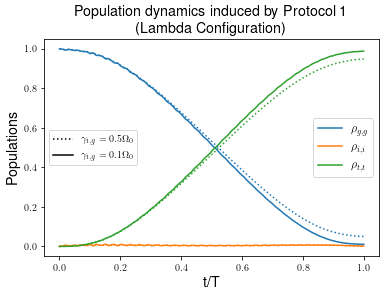

In [9]:
plt.plot(times, population_dynamics[:,0,0], label=r"$\rho_{g,g}$", color="C0",)
plt.plot(times, population_dynamics[:,0,1], label=r"$\rho_{i,i}$", Color="C1")
plt.plot(times, population_dynamics[:,0,2], label=r"$\rho_{t,t}$", color="C2")
plt.plot(times, population_dynamics[:,1,0], ":", color="C0")
plt.plot(times, population_dynamics[:,1,1], ":", color="C1")
plt.plot(times, population_dynamics[:,1,2], ":", color="C2")
plt.xlabel("t/T", fontsize='x-large')
plt.ylabel("Populations", fontsize='x-large')
plt.title("Population dynamics induced by Protocol 1 \n (Lambda Configuration)", fontsize='x-large')
plt.legend(fontsize='large')

print(np.max(population_dynamics[:,0,2])-np.max(population_dynamics[:,0,1]))
print(np.max(population_dynamics[:,1,2])-np.max(population_dynamics[:,1,1]))

dotted_line = mlines.Line2D([], [], color='black', linestyle=':', label="$\gamma_{i,g} = 0.5\Omega_0$")
solid_line = mlines.Line2D([], [], color='black', linestyle='-', label="$\gamma_{i,g} = 0.1\Omega_0$")
legend1 = plt.legend(handles=[dotted_line, solid_line], loc='center left')
plt.legend(loc='right', fontsize='large')
plt.gca().add_artist(legend1)

plt.savefig("Proto1Lambda",dpi=600, bbox_inches = "tight")

0.8671457185473548
0.283442475578657


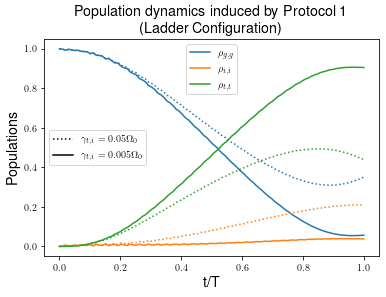

In [10]:
plt.plot(times, population_dynamics[:,2,0], label=r"$\rho_{g,g}$", color="C0",)
plt.plot(times, population_dynamics[:,2,1], label=r"$\rho_{i,i}$", Color="C1")
plt.plot(times, population_dynamics[:,2,2], label=r"$\rho_{t,t}$", color="C2")
plt.plot(times, population_dynamics[:,3,0], ":", color="C0")
plt.plot(times, population_dynamics[:,3,1], ":",  color="C1")
plt.plot(times, population_dynamics[:,3,2], ":", color="C2")
plt.xlabel("t/T", fontsize='x-large')
plt.ylabel("Populations", fontsize='x-large')
plt.title("Population dynamics induced by Protocol 1 \n (Ladder Configuration)", fontsize='x-large')
plt.legend(fontsize='x-large')

print(np.max(population_dynamics[:,2,2])-np.max(population_dynamics[:,2,1]))
print(np.max(population_dynamics[:,3,2])-np.max(population_dynamics[:,3,1]))

dotted_line = mlines.Line2D([], [], color='black', linestyle=':', label="$\gamma_{t,i} = 0.05\Omega_0$")
solid_line = mlines.Line2D([], [], color='black', linestyle='-', label="$\gamma_{t,i} = 0.005\Omega_0$")
legend1 = plt.legend(handles=[dotted_line, solid_line], loc='center left')
plt.legend(loc='upper center')
plt.gca().add_artist(legend1)

plt.savefig("Proto1Ladder",dpi=600, bbox_inches = "tight")

0.9767820856447798
0.9385384873324119


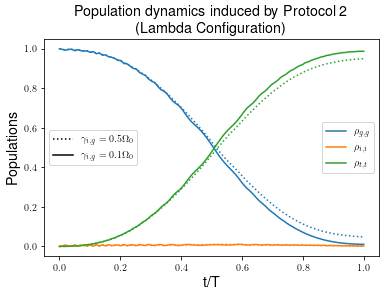

In [11]:
plt.plot(times, population_dynamics[:,4,0], label=r"$\rho_{g,g}$", color="C0",)
plt.plot(times, population_dynamics[:,4,1], label=r"$\rho_{i,i}$", Color="C1")
plt.plot(times, population_dynamics[:,4,2], label=r"$\rho_{t,t}$", color="C2")
plt.plot(times, population_dynamics[:,5,0], ":", color="C0")
plt.plot(times, population_dynamics[:,5,1], ":", color="C1")
plt.plot(times, population_dynamics[:,5,2], ":", color="C2")
plt.xlabel("t/T", fontsize='x-large')
plt.ylabel("Populations", fontsize='x-large')
plt.title("Population dynamics induced by Protocol 2 \n (Lambda Configuration)", fontsize='x-large')
plt.legend(fontsize='x-large')
print(np.max(population_dynamics[:,4,2])-np.max(population_dynamics[:,4,1]))
print(np.max(population_dynamics[:,5,2])-np.max(population_dynamics[:,5,1]))
dotted_line = mlines.Line2D([], [], color='black', linestyle=':', label="$\gamma_{i,g} = 0.5\Omega_0$")
solid_line = mlines.Line2D([], [], color='black', linestyle='-', label="$\gamma_{i,g} = 0.1\Omega_0$")
legend1 = plt.legend(handles=[dotted_line, solid_line], loc='center left')
plt.legend(loc='right')
plt.gca().add_artist(legend1)
plt.savefig("Proto2Lambda", dpi=600, bbox_inches = "tight")

0.8671289182862473
0.34753794629694307


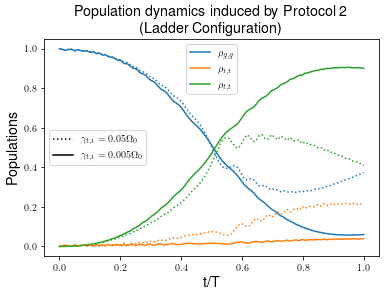

In [12]:
plt.plot(times, population_dynamics[:,6,0], label=r"$\rho_{g,g}$", color="C0",)
plt.plot(times, population_dynamics[:,6,1], label=r"$\rho_{i,i}$", Color="C1")
plt.plot(times, population_dynamics[:,6,2], label=r"$\rho_{t,t}$", color="C2")
plt.plot(times, population_dynamics[:,7,0], ":", color="C0")
plt.plot(times, population_dynamics[:,7,1], ":", color="C1")
plt.plot(times, population_dynamics[:,7,2], ":", color="C2")
plt.xlabel("t/T", fontsize='x-large')
plt.ylabel("Populations", fontsize='x-large')
plt.title("Population dynamics induced by Protocol 2 \n (Ladder Configuration)", fontsize='x-large')
plt.legend(fontsize='x-large')

plt.legend()
print(np.max(population_dynamics[:,6,2])-np.max(population_dynamics[:,6,1]))
print(np.max(population_dynamics[:,7,2])-np.max(population_dynamics[:,7,1]))

dotted_line = mlines.Line2D([], [], color='black', linestyle=':', label="$\gamma_{t,i} = 0.05\Omega_0$")
solid_line = mlines.Line2D([], [], color='black', linestyle='-', label="$\gamma_{t,i} = 0.005\Omega_0$")
legend1 = plt.legend(handles=[dotted_line, solid_line], loc='center left')
plt.legend(loc='upper center')
plt.gca().add_artist(legend1)
plt.savefig("Proto2Ladder", dpi=600, bbox_inches = "tight")

In [74]:
"""
An analysis of the performance based on varying decay rates:
Protocol 2:
"""

Omega2 = 40.
times2 = np.linspace(0,1,100)
grid_dimension2 = 50
ladder_performance_grid2 = np.zeros((grid_dimension2, grid_dimension2))
lambda_performance_array2 = np.zeros(grid_dimension2)
populations_lad2 = np.zeros((len(times2),3))
populations_lam2 = np.zeros((len(times2),3))
for (x,y), element in np.ndenumerate(ladder_performance_grid2):
    decay_rates2 = [(x/50)*Omega2, (y/5000)*Omega2]
    decay_lambda2 = (y/50)*Omega2
    Lambda_c_op2 = np.sqrt(decay_lambda2)*qt.projection(3,0,1)
    Ladder_c_ops2 = [np.sqrt(decay_rates2[0])*qt.projection(3,0,1), np.sqrt(decay_rates2[1])*qt.projection(3,1,2)]
    results1lad2 = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p2],[detuning, delta2]], tlist=times2,
                    rho0=init_state, c_ops=Ladder_c_ops2)
    if x==0:
        results1lam2 = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p2],[detuning, delta2]], tlist=times2,
                                rho0=init_state, c_ops=Lambda_c_op2)
        for i in range(len(times2)):
            populations_lad2[i,:] = results1lad2.states[i].diag()[:]
            populations_lam2[i,:] = results1lam2.states[i].diag()[:]

        lambda_performance_array2[y] = populations_lam2[-1,2] 
        ladder_performance_grid2[x,y] = populations_lad2[-1,2]
    else:
        for i in range(len(times2)):
            populations_lad2[i,:] = results1lad2.states[i].diag()[:]
        ladder_performance_grid2[x,y] = populations_lad2[-1,2] 

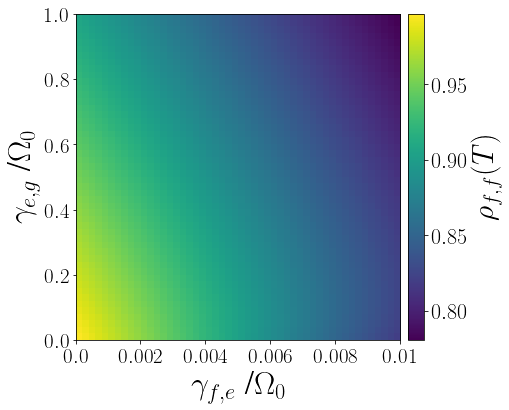

In [75]:

fig, ax = plt.subplots(1,1, figsize=(7,6))
img2 = plt.imshow(ladder_performance_grid2, origin = "lower", extent = [0,0.01,0,1],aspect='auto')
plt.xlabel("$\gamma_{f,e}$ /$\Omega_0$", fontsize="32")
plt.ylabel("$\gamma_{e,g}$ /$\Omega_0$", fontsize="32")

# plt.text(x = 1.3, y = 0.35, s = "Performance", fontsize="", rotation="vertical")


ax.tick_params(axis='both', labelsize='21')
ax.set_xticklabels(["$0.0$", "$0.002$", "$0.004$", "$0.006$", "$0.008$", "$0.01$"])
cb = plt.colorbar(img2, orientation="vertical", pad=0.02)
cb.set_label(label=r"$\rho_{f,f}(T)$", size='30')
cb.ax.tick_params(labelsize='22')

plt.savefig("Plots/sensitivity_map_proto2",dpi=600, bbox_inches = "tight")

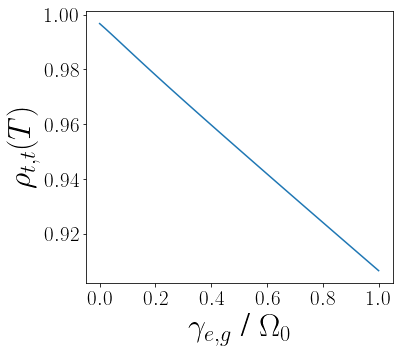

In [76]:
fig, ax = plt.subplots(1,1, figsize=(5.5,5))

ax.plot(np.linspace(0,1,50),lambda_performance_array2)
ax.set_xlabel("$\gamma_{e, g}$ / $\Omega_0$", fontsize="32")
ax.set_ylabel(r"$\rho_{t,t}(T)$", fontsize="32")
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
# ax.set_xticklabels([r"$0$", r"$0.2$", r"$0.4$", r"$0.6$", r"$0.8$",r"$1$"])
ax.tick_params(axis='both', labelsize='21')
fig.savefig("Plots/sensitivity_plot_proto2",dpi=600, bbox_inches = "tight")

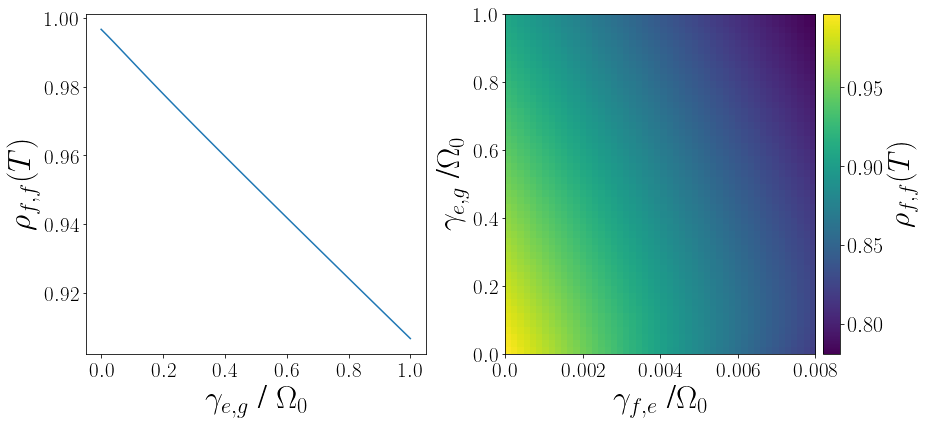

In [83]:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 1.1]}, figsize=(13,6),)


# plt.text(x = 1.3, y = 0.35, s = "Performance", fontsize="", rotation="vertical")
# fig, ax = plt.subplots(1,1, figsize=(5.5,5))

ax[0].plot(np.linspace(0,1,50),lambda_performance_array2)
ax[0].set_xlabel("$\gamma_{e, g}$ / $\Omega_0$", fontsize="32")
ax[0].set_ylabel(r"$\rho_{f,f}(T)$", fontsize="32")
ax[0].set_xticks([0,0.2,0.4,0.6,0.8,1])
# ax.set_xticklabels([r"$0$", r"$0.2$", r"$0.4$", r"$0.6$", r"$0.8$",r"$1$"])
ax[0].tick_params(axis='both', labelsize='21')
# fig.savefig("Plots/sensitivity_plot_proto2",dpi=600, bbox_inches = "tight")



img = plt.imshow(ladder_performance_grid2, origin = "lower", extent = [0,0.01,0,1],aspect='auto')
ax[1].set_xlabel("$\gamma_{f,e}$ /$\Omega_0$", fontsize="32")
ax[1].set_ylabel("$\gamma_{e,g}$ /$\Omega_0$", fontsize="32")
ax[1].tick_params(axis='both', labelsize='21')
ax[1].set_xticklabels(["$0.0$", "$0.002$", "$0.004$", "$0.006$", "$0.008$", "$0.01$"])
cb = plt.colorbar(img, orientation="vertical", pad=0.02)
cb.set_label(label=r"$\rho_{f,f}(T)$", size='30')
cb.ax.tick_params(labelsize='22')

fig.tight_layout()
plt.savefig("Plots/sensitivities_proto2",dpi=600, bbox_inches = "tight")

In [78]:
"""
An analysis of the performance based on varying decay rates:
Protocol 1:
"""

Omega1 = 40.
times1 = np.linspace(0,1,100)
grid_dimension1 = 50
ladder_performance_grid1 = np.zeros((grid_dimension1, grid_dimension1))
lambda_performance_array1 = np.zeros(grid_dimension1)
populations_lad1 = np.zeros((len(times1),3))
populations_lam1 = np.zeros((len(times1),3))
for (x,y), element in np.ndenumerate(ladder_performance_grid1):
    decay_rates1 = [(x/50)*Omega1, (y/5000)*Omega1]
    decay_lambda1 = (y/50)*Omega1
    Lambda_c_op1 = np.sqrt(decay_lambda1)*qt.projection(3,0,1)
    Ladder_c_ops1 = [np.sqrt(decay_rates1[0])*qt.projection(3,0,1), np.sqrt(decay_rates1[1])*qt.projection(3,1,2)]
    results1lad1 = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p1],[detuning, delta1]], tlist=times1,
                    rho0=init_state, c_ops=Ladder_c_ops1)
    if x==0:
        results1lam1 = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p1],[detuning, delta1]], tlist=times1,
                                rho0=init_state, c_ops=Lambda_c_op1)
        for i in range(len(times1)):
            populations_lad1[i,:] = results1lad1.states[i].diag()[:]
            populations_lam1[i,:] = results1lam1.states[i].diag()[:]

        lambda_performance_array1[y] = populations_lam1[-1,2] 
        ladder_performance_grid1[x,y] = populations_lad1[-1,2]
    else:
        for i in range(len(times1)):
            populations_lad1[i,:] = results1lad1.states[i].diag()[:]
        ladder_performance_grid1[x,y] = populations_lad1[-1,2] 

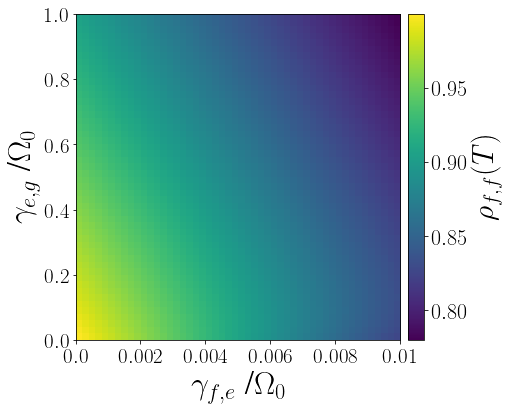

In [79]:

fig, ax = plt.subplots(1,1, figsize=(7,6))
img1 = plt.imshow(ladder_performance_grid1, origin = "lower", extent = [0,0.01,0,1],aspect='auto')
plt.xlabel("$\gamma_{f,e}$ /$\Omega_0$", fontsize="32")
plt.ylabel("$\gamma_{e,g}$ /$\Omega_0$", fontsize="32")



ax.tick_params(axis='both', labelsize='21')

cb = plt.colorbar(img1, orientation="vertical", pad=0.02)
cb.set_label(label=r"$\rho_{f,f}(T)$", size='30')
ax.set_xticklabels(["$0.0$", "$0.002$", "$0.004$", "$0.006$", "$0.008$", "$0.01$"])
cb.ax.tick_params(labelsize='22')

plt.savefig("Plots/sensitivity_map_proto1",dpi=600, bbox_inches = "tight")

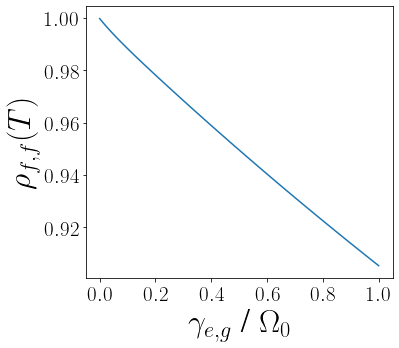

In [80]:
fig, ax = plt.subplots(1,1, figsize=(5.5,5))

ax.plot(np.linspace(0,1,50),lambda_performance_array1)
ax.set_xlabel("$\gamma_{e, g}$ / $\Omega_0$", fontsize="32")
ax.set_ylabel(r"$\rho_{f,f}(T)$", fontsize="32")
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax.tick_params(axis='both', labelsize='21')
fig.savefig("Plots/sensitivity_plot_proto1",dpi=600, bbox_inches = "tight")

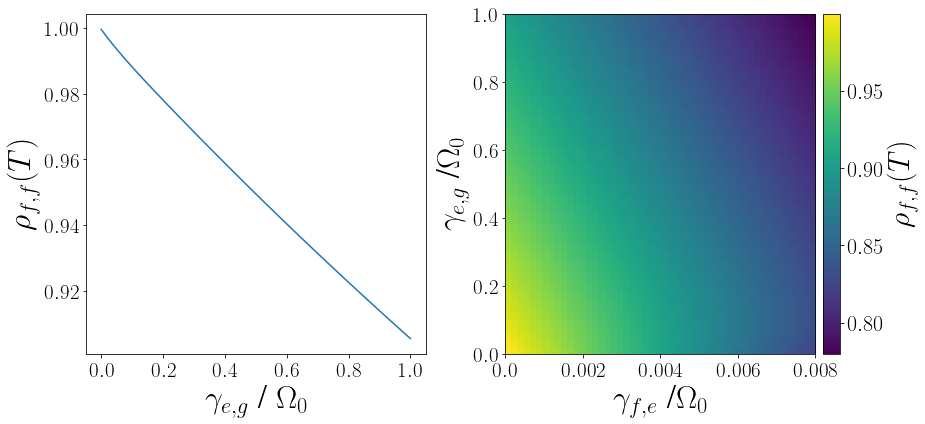

In [82]:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 1.1]}, figsize=(13,6))


# plt.text(x = 1.3, y = 0.35, s = "Performance", fontsize="", rotation="vertical")
# fig, ax = plt.subplots(1,1, figsize=(5.5,5))

ax[0].plot(np.linspace(0,1,50),lambda_performance_array1)
ax[0].set_xlabel("$\gamma_{e, g}$ / $\Omega_0$", fontsize="32")
ax[0].set_ylabel(r"$\rho_{f,f}(T)$", fontsize="32")
ax[0].set_xticks([0,0.2,0.4,0.6,0.8,1])
# ax.set_xticklabels([r"$0$", r"$0.2$", r"$0.4$", r"$0.6$", r"$0.8$",r"$1$"])
ax[0].tick_params(axis='both', labelsize='21')
# fig.savefig("Plots/sensitivity_plot_proto2",dpi=600, bbox_inches = "tight")



img1 = plt.imshow(ladder_performance_grid1, origin = "lower", extent = [0,0.01,0,1],aspect='auto')
ax[1].set_xlabel("$\gamma_{f,e}$ /$\Omega_0$", fontsize="32")
ax[1].set_ylabel("$\gamma_{e,g}$ /$\Omega_0$", fontsize="32")
ax[1].tick_params(axis='both', labelsize='21')
ax[1].set_xticklabels(["$0.0$", "$0.002$", "$0.004$", "$0.006$", "$0.008$", "$0.01$"])
cb = plt.colorbar(img1, orientation="vertical", pad=0.02)
cb.set_label(label=r"$\rho_{f,f}(T)$", size='30')
cb.ax.tick_params(labelsize='22')

fig.tight_layout()
plt.savefig("Plots/sensitivities_proto1",dpi=600, bbox_inches = "tight")